In [1]:
import os
os.environ['SETIGEN_ENABLE_GPU'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
import blimpy as bl

import setigen as stg

bshuf filter already loaded, skip it.
zfp filter already loaded, skip it.


0.9999999999999999 0.0009790690638448315
0.9999999999999999 0.0009790690638448315


In [3]:
# Sometimes it can be necessary to re-run this command for plots to show automatically
%matplotlib inline

Subblocks:   0%|          | 0/64 [00:00<?, ?it/s]

0.9999999999999999 0.0009790690638448315



Blocks: 100%|██████████| 1/1 [00:06<00:00,  6.85s/it]     


working stem: example_1block
opening file: example_1block.0000.raw
opening file: example_1block.0001.raw [No such file or directory]
output product 0: 32 spectra


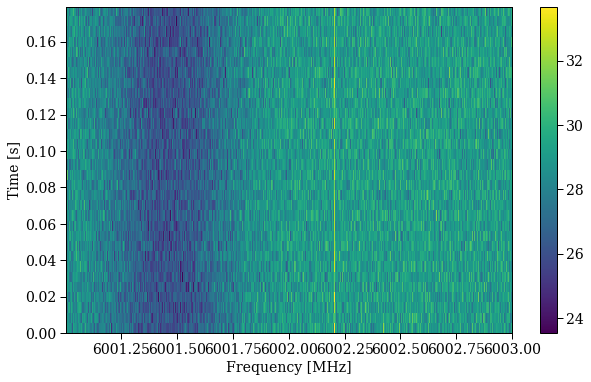

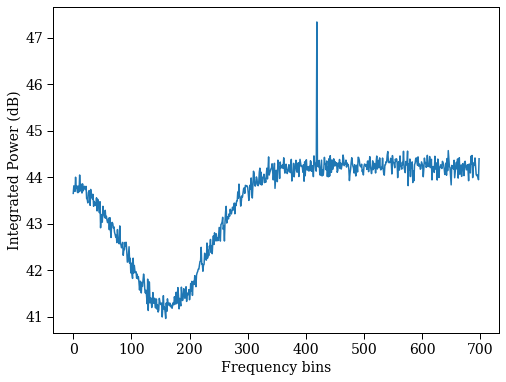

In [81]:
from astropy import units as u
from setigen.voltage import *

a = Antenna(sample_rate=3*u.GHz,
            fch1=6000*u.MHz,
            ascending=True,
            num_pols=2)

for s in a.streams:
    s.add_noise(v_mean=0,
                v_std=1)

    s.add_constant_signal(f_start=6002.2*u.MHz,
                          drift_rate=-2*u.Hz/u.s,
                          level=0.002)

d = RealQuantizer(target_fwhm=32,
                  num_bits=8)

f = PolyphaseFilterbank(num_taps=8,
                        num_branches=1024)

r = ComplexQuantizer(target_fwhm=32,
                     num_bits=8)

rvb = RawVoltageBackend(a,
                        digitizer=d,
                        filterbank=f,
                        requantizer=r,
                        start_chan=0,
                        num_chans=64,
                        block_size=134217728,
                        blocks_per_file=128,
                        num_subblocks=32)

rvb.record(output_file_stem='example_1block',
           num_blocks=1,
           length_mode='num_blocks',
           header_dict={'TELESCOP': 'GBT'},
           verbose=False)

!rawspec -f 1024 -t 16 -d . example_1block

wf = bl.Waterfall('example_1block.rawspec.0000.fil',
                  f_start=6001.0,
                  f_stop=6003.0)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.title('')
plt.savefig('setigen-v-signal.pdf', bbox_inches='tight')
plt.show()

# Viewing data in dB
x = stg.db(np.sum(wf.data[:, 0, :], axis=0))

plt.figure(figsize=(8, 6))
plt.plot(x)
plt.xlabel('Frequency bins')
plt.ylabel('Integrated Power (dB)')
plt.show()

<ipython-input-87-7efc8c4e9240>:24: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(25, 45)


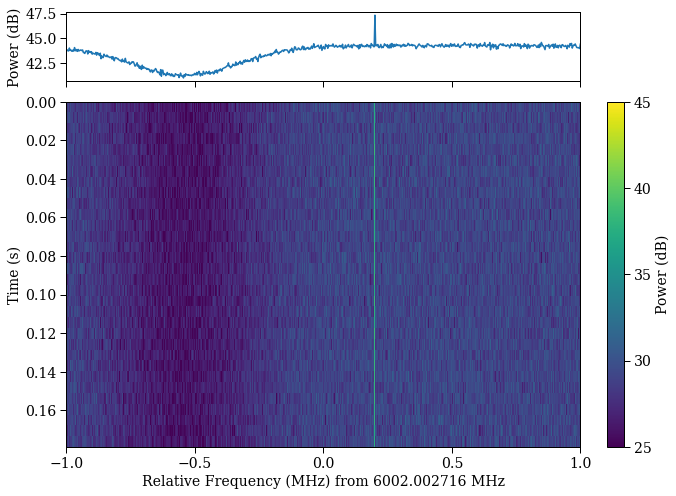

In [87]:
import matplotlib.gridspec as grd

fig = plt.figure(figsize=(10, 8))

gs = grd.GridSpec(2, 2, height_ratios=[2,10], width_ratios=[30,1], wspace=0.1, hspace=0.1)


ax = plt.subplot(gs[2])
p=ax.imshow(frame.get_data(use_db=True), 
           extent=[(frame.fs[0]-frame.fs[350])/1e6,
                   (frame.fs[-1]+frame.df-frame.fs[350])/1e6,
                   frame.ts[-1]+frame.dt,
                   frame.ts[0]],
           aspect='auto', 
           interpolation='none',
           vmin=25, vmax=45)
plt.xticks(ticks=[-1, -0.5, 0, 0.5, 1])
plt.xlabel(f'Relative Frequency (MHz) from {frame.fs[350]/1e6:.6f} MHz')
plt.ylabel('Time (s)')

colorAx = plt.subplot(gs[3])
cbar = plt.colorbar(p, cax = colorAx, ticks=np.arange(25, 50, 5))
cbar.set_label('Power (dB)')
cbar.set_clim(25, 45)
# cbar.ax.locator_params(nbins=5)


ax2 = plt.subplot(gs[0])
ax2.plot(np.linspace(-1, 1, wf.data.shape[2]), 
         stg.db(np.sum(wf.data[:, 0, :], axis=0)))
plt.xlim((frame.fs[0]-frame.fs[350])/1e6,
                   (frame.fs[-1]+frame.df-frame.fs[350])/1e6)
plt.xticks(ticks=[-1, -0.5, 0, 0.5, 1])
ax2.tick_params(axis='x', labelbottom=False)
plt.ylabel('Power (dB)')

plt.savefig('setigen-v-signal-multi.pdf', bbox_inches='tight')
plt.show()

In [73]:
np.arange(25, 50, 5)

array([25, 30, 35, 40, 45])

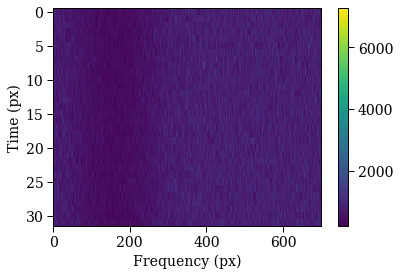

In [86]:
frame.plot()